In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#there is no null values in the features 

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Exploratry data analysis (EDA) 


1-univariate analysis
as we have to look at the relationship between features and the target (profit) to have a closer look at what we have to change 
or edit to get the most possible profit 

In [13]:
#Features analysis 
!pip install sweetviz


In [14]:
import sweetviz as sv 

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

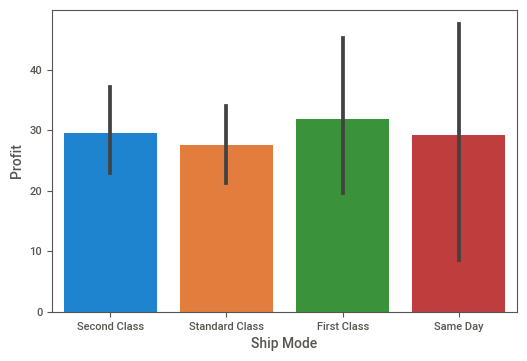

In [20]:
#to look at each feature with profit we can visualize the relationship between them
sns.barplot(x='Ship Mode', y= 'Profit', data=data)

we can see that there is no big difference between the methods of shipment, as the  profit is too close in the all types

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

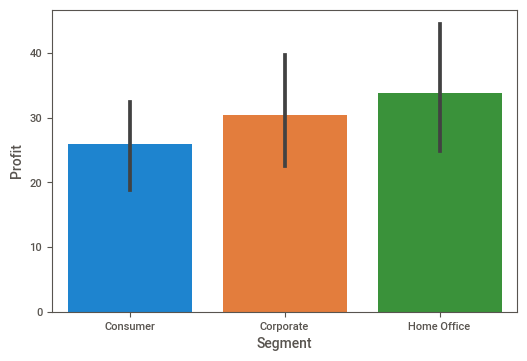

In [21]:
sns.barplot(x='Segment', y= 'Profit', data=data)

In [22]:
#there is a small difference between types of clients

<AxesSubplot:xlabel='Category', ylabel='Profit'>

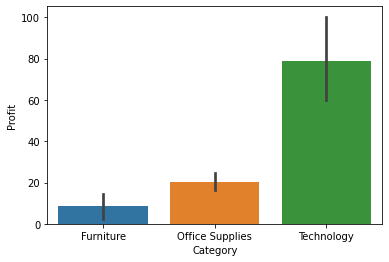

In [4]:
sns.barplot(x='Category', y= 'Profit', data=data)

there is an obvious relative high profit when it is in the technology category.
so we have to take in consideration that is a strong point for the business, in other hand we have to work more on furniture and office supplies as it gets much lower profit than technology category, we have to look closer on cost, number of sales and marketing plans for theses products to get more profit from these products also.

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

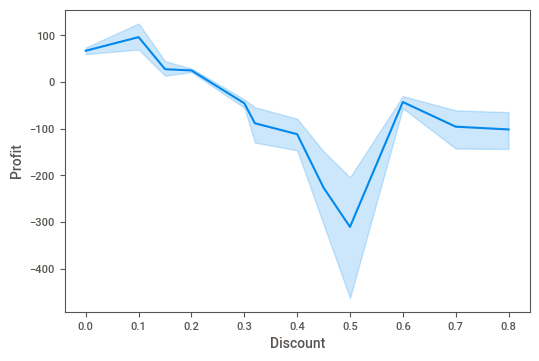

In [76]:
sns.lineplot(x='Discount', y= 'Profit', data=data)

As it shows in the previous figure, it is obvious that huge discount specially after 0.2 the profit will be affected
not only just affecting but also it turned into losses, so we have to work on the percentage of Discounts to have a maximum of 0.2

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

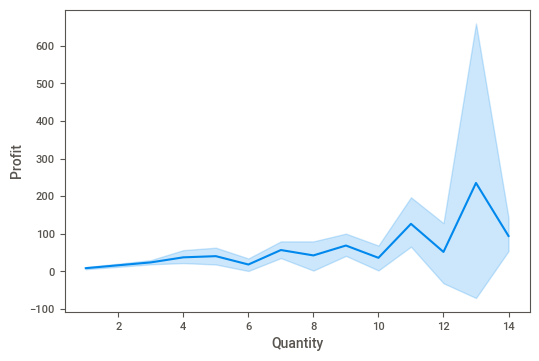

In [64]:
sns.lineplot(x='Quantity', y= 'Profit', data=data)

the relation between the quantity and profut is not linear as it is usually thought, so we have to make closer look about the quantities that make more profits and maybe make offer inslcuding number of items to reach the desired profit , by looking at this graph and graph of discount we can reach to an equation to make a point where we can make offers on certain quantity of items and certain discount witout turnng this discounts into losses but also profits if we had to do this discount it should be with the right numbers of selected items.

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

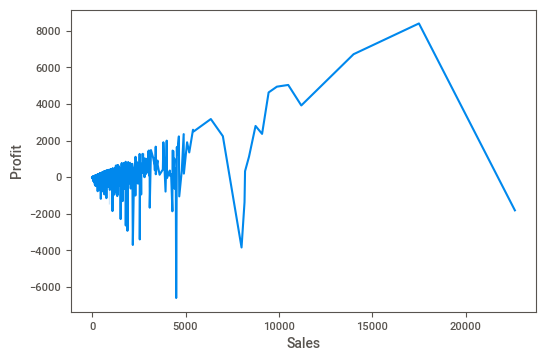

In [65]:
sns.lineplot(x='Sales', y= 'Profit', data=data)

it is expected from the discount and quantity , the sales is not linear relation with the profit, as number of sales doesnt provide a proof of high profit, what it said in the Business field this company is burning resources, maybe it makes alot of discounts which is not profitable but it makes sales numbers are very high, so the sales is the last thing to look at to make profit in such cases, as we have a weak areas in decision making like: Discounts and marketing plans to focus more on other products as if we have a closer look on the number of sales vs the categories:

<AxesSubplot:xlabel='Category', ylabel='Sales'>

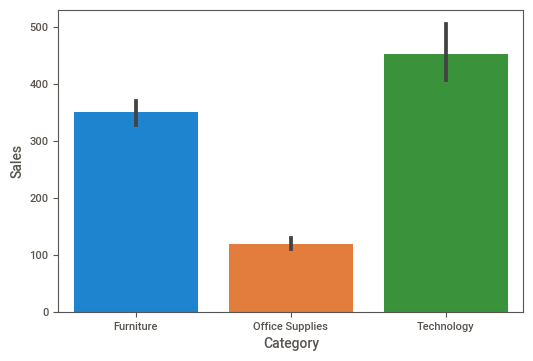

In [73]:
sns.barplot(x='Category', y= 'Sales', data=data)

As expected, we have alot of sales in furniture almost near to tech(the first profitable category as we mentioned in analysis between category and profit ) but it doesnt get profit, so we have to gain more profit from this category as its numbers of sales are very good, why is it not profitable ?  this is the right question now

to take things more accurate, lets look closer at the numbers of sales with discounts:

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

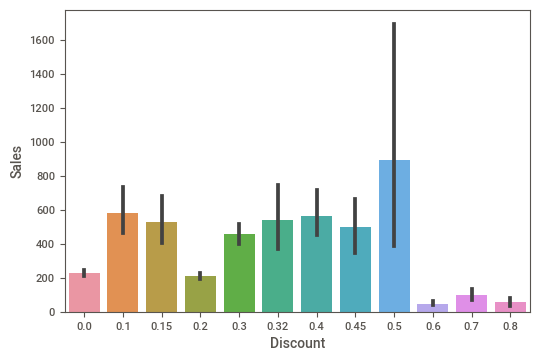

In [74]:
sns.barplot(x='Discount', y= 'Sales', data=data)

we have a surprise here, at the ,maximum discount, it has lowest sales numbers, and max losses also form the graph of profit and discount, so we have to stop it immediately, it is total loss.

<AxesSubplot:xlabel='City', ylabel='Sales'>

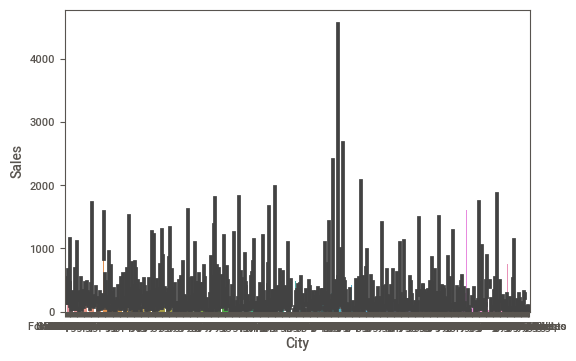

In [78]:
sns.barplot(x='City', y= 'Sales', data=data)

the graph is to hard to drive insights form it , so we will make it in other form and make important insight about the most important number. which is max in profit and sales.

In [81]:
max_sales_city = data.groupby("City")["Sales"].max()
max_sales_city


City
Aberdeen         25.500
Abilene           1.392
Akron           665.408
Albuquerque     595.000
Alexandria     4164.050
                 ...   
Woonsocket       52.960
Yonkers        4899.930
York            422.058
Yucaipa          50.800
Yuma            599.985
Name: Sales, Length: 531, dtype: float64

this table also is a great summary to give up on some cities if the history of sales is not enough to continue in it, and focus on that we had a great performance on it.
we can put more effort on that, what is the segment, why we are sealling there alot? to apply it on other countries if we are planning to expand in other countries with similar charcteristics.

In [83]:
max_Profit_city = data.groupby("City")["Profit"].max()
max_Profit_city

City
Aberdeen          6.6300
Abilene          -3.7584
Akron            66.5408
Albuquerque     138.3552
Alexandria       83.2810
                 ...    
Woonsocket       22.8900
Yonkers        2400.9657
York             23.7742
Yucaipa          13.2080
Yuma             48.7011
Name: Profit, Length: 531, dtype: float64

it is a table of what we make according to the city of sale, we have to look at it again and make sure that we are expanding in the more profitable cities , changing plans in the others which we dont earn enough or dont at all.

C:\Users\Anas Morad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

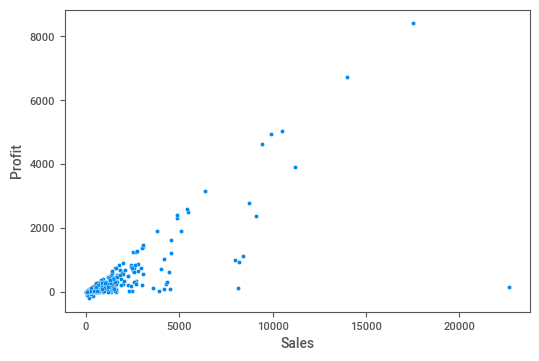

In [90]:
sns.scatterplot(max_sales_city, max_Profit_city)

you can see that there some features that is not included in the analysis as it will not affect the profit and can not be changed like country as all data is driven from the same country, sub category also doesnt bring much info as the category itself say it all, so we didnt mention these features on our report to focus more on what to change, repeat, and study to make these company expands, continues and grows. 